In [2]:
## Path to save the figures
out = './figures_definitive'

In [1]:
import seaborn as sns
import pandas as pd
import os
import matplotlib as mpl
from matplotlib import pyplot as plt


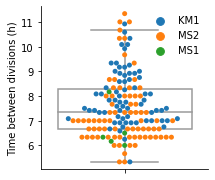

In [64]:
data = pd.read_excel(os.path.join(out, 'cell_division_live_imaging.xlsx'))

# transform to hours
data['time_h'] = data['time_min']/60

mpl.rcParams['figure.figsize'] = 3,3 #make it a bit wider to make equalize it to the rest of the figure

ax = sns.boxplot(data = data, y = 'time_h', color = 'w', showfliers=False)
ax = sns.swarmplot(data = data, x = ['']*len(data), y = 'time_h', hue = 'Embryo') #  x = ['']*len(data) workaround 

# AESTHETICS
#ax.tick_params(bottom=False, labelbottom=False)
ax.set(xlabel = None)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

ax.legend(loc='upper right', frameon = False)  # reverse both handles and labels
#ax.set_ylim(0, 35)

plt.ylabel('Time between divisions (h)')

path = 'cell_division_live_imaging'

plt.savefig(os.path.join(out, path + '.svg'), dpi = 300)

Text(0, 0.5, 'Time (min)')

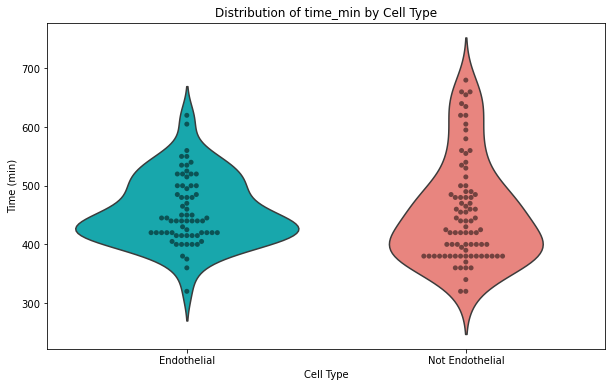

In [5]:
df = pd.read_excel(os.path.join(out, 'cell_division_live_imaging.xlsx'))


# Define the color palette for the cell types
palette = {'Not Endothelial': '#f9766e', 'Endothelial': '#00bec4'}

# Create the violin plot with individual points
plt.figure(figsize=(10, 6))
sns.violinplot(x='cell_type', y='time_min', data=df, palette=palette, inner=None)
sns.swarmplot(x='cell_type', y='time_min', data=df, color='k', alpha=0.5)

# Set title and labels if needed
plt.title('Distribution of time_min by Cell Type')
plt.xlabel('Cell Type')
plt.ylabel('Time (min)')

cell_type
Endothelial        457.238806
Not Endothelial    454.464286
Name: time_min, dtype: float64
T-statistic: 0.22231579503068286, P-value: 0.8243724973435064


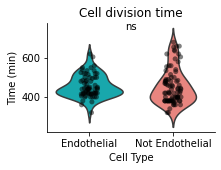

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = pd.read_excel(os.path.join(out, 'cell_division_live_imaging.xlsx'))

# Assuming df is already defined and contains the necessary columns
# Define the color palette for the cell types
palette = {'Not Endothelial': '#f9766e', 'Endothelial': '#00bec4'}

# Calculate average time_min for each cell_type
average_time = df.groupby('cell_type')['time_min'].mean()
print(average_time)

# Perform t-test to compare both cell types
endothelial_times = df[df['cell_type'] == 'Endothelial']['time_min']
not_endothelial_times = df[df['cell_type'] == 'Not Endothelial']['time_min']
t_stat, p_value = ttest_ind(endothelial_times, not_endothelial_times)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Create the violin plot with individual points
plt.figure(figsize=(3, 2))
sns.violinplot(x='cell_type', y='time_min', data=df, palette=palette, inner=None)
sns.stripplot(x='cell_type', y='time_min', data=df, color='k', alpha=0.5, jitter=True)

# Annotate the plot with the significance level
significance_level = 'ns' if p_value > 0.05 else '*' if p_value <= 0.05 else '**' if p_value <= 0.01 else '***' if p_value <= 0.001 else '****'
plt.annotate(significance_level, xy=(0.5, max(df['time_min'])), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom')

# Remove top and right lines of the graph square
sns.despine()

# Set title and labels if needed
plt.title('Cell division time')
plt.xlabel('Cell Type')
plt.ylabel('Time (min)')

# Save the plot with smaller proportions so the letters appear bigger
plt.savefig('violin_plot_cell_division_live.png', dpi=300, bbox_inches='tight')

In [7]:
df

,Embryo,Endocardium,Myocardium,ratio
0,1,123,456,3.707317
1,2,89,382,4.292135
2,3,137,538,3.927007
3,4,101,359,3.554455
4,5,152,556,3.657895


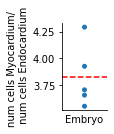

In [27]:
df = pd.read_excel("counted_MF20_ERG_cells.xlsx")

# Calculate the average ratio across all embryos
average_ratio = df['ratio'].mean()

# Create a 2D dot plot for individual embryo ratios
plt.figure(figsize=(0.8, 1.6))
sns.stripplot(x=pd.Series([1]*df.shape[0]), y='ratio', data=df, jitter=False)

# Add a horizontal line for the average ratio
plt.axhline(average_ratio, color='red', linestyle='--', label=f'Average Ratio: {average_ratio:.2f}')

# Remove top and right spines
sns.despine()

plt.xlabel('Embryo')
plt.xticks([])  # Hide x-axis ticks
plt.ylabel('num cells Myocardium/ \n num cells Endocardium')
#plt.ylim(0, df['ratio'].max()+0.3)  # Set y-axis limits
#plt.title('Ratio of Myocardium to Endocardium Cells per Embryo')
#plt.legend()


plt.savefig('ratio_CM_EC.png', dpi=300, bbox_inches='tight')